In [66]:
from random import randint
import matplotlib
import numpy
from keras.layers import LSTM
from keras.models import Sequential
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

(672, 182)


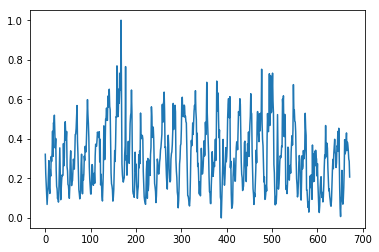

In [67]:
feature_size = 182
time_steps = 24
dataset = numpy.fromfile(open('../data/traffic.bin', 'rb'),
                         dtype=numpy.float64).reshape(feature_size, time_steps * 7 * 4)
dataset = dataset.transpose()
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print dataset.shape
pyplot.plot(dataset[:, 7])
pyplot.show()

(504, 182) (168, 182)
(480, 182) (480, 182) (144, 182) (144, 182)
(20, 24, 182) (20, 24, 182) (6, 24, 182) (6, 24, 182)


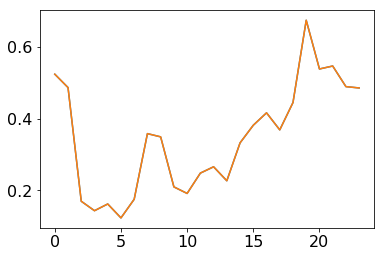

In [106]:
train_size = time_steps * 7 * 3
test_size = time_steps * 7 * 1
train, test = dataset[:train_size, :], dataset[-test_size:, :]
print train.shape, test.shape

trainX, trainY = train[:-time_steps, :], train[time_steps:, :]
testX, testY = test[:-time_steps, :], test[time_steps:, :]
print trainX.shape, trainY.shape, testX.shape, testY.shape

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (-1, time_steps, feature_size))
trainY = numpy.reshape(trainY, (-1, time_steps, feature_size))
testX = numpy.reshape(testX, (-1, time_steps, feature_size))
testY = numpy.reshape(testY, (-1, time_steps, feature_size))
print trainX.shape, trainY.shape, testX.shape, testY.shape

# plot and validate
pyplot.plot(testX[1, :, 7])
pyplot.plot(testY[0, :, 7])
pyplot.show()

In [69]:
hidden_size = 32
model = Sequential()
model.add(LSTM(hidden_size, input_shape=(
    time_steps, feature_size), return_sequences=True))
model.add(LSTM(feature_size, input_shape=(
    time_steps, hidden_size), return_sequences=True))
model.compile(loss='mae', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 24, 32)            27520     
_________________________________________________________________
lstm_26 (LSTM)               (None, 24, 182)           156520    
Total params: 184,040
Trainable params: 184,040
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
model.fit(trainX, trainY, epochs=5000, batch_size=8, verbose=1)

Epoch 1/5000
20/20 [==============================] - 0s 5ms/step - loss: 0.0180
Epoch 2/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 3/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 4/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 5/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 6/5000
20/20 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 7/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 8/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 9/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 10/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 11/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 12/5000
20/20 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 13/5000
20/20 [====

KeyboardInterrupt: 

In [108]:
# evaluate model
loss = model.evaluate(testX, testY, verbose=0)
print('MAE: %f' % loss)

MAE: 0.074701


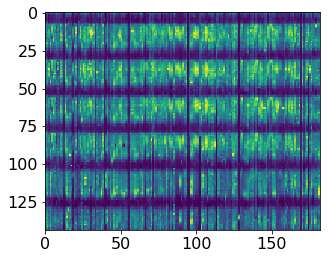

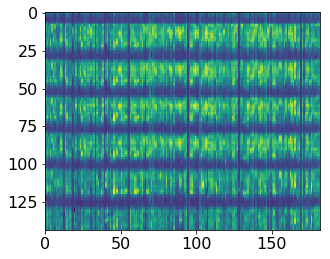

In [109]:
testYhat = model.predict(testX, verbose=0)

img = testY.reshape(testY.shape[0] * testY.shape[1], -1)
pyplot.imshow(img)
pyplot.show()
img = testYhat.reshape(testYhat.shape[0] * testYhat.shape[1], -1)
pyplot.imshow(img)
pyplot.show()

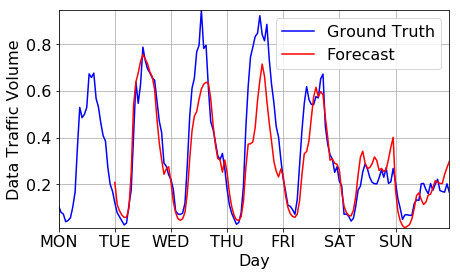

In [118]:
WEEKDAYS = ['MON','TUE','WED','THU','FRI','SAT','SUN']
# feature_id = randint(0, feature_size)
feature_id = 153
fig = pyplot.figure(figsize=[7, 4])
matplotlib.rc('font', size=16)
pyplot.plot(test[:, feature_id], 'b', label='Ground Truth')

data = numpy.empty(test_size)
that = testYhat.reshape(time_steps * 6, -1)
data[time_steps:] = that[:, feature_id]
data[:time_steps] = numpy.nan
pyplot.plot(data, 'r', label='Forecast')
pyplot.xlabel('Day')
pyplot.xticks(numpy.arange(0, 24*7, 24),WEEKDAYS)
pyplot.ylabel('Data Traffic Volume')
pyplot.ylim([0, 1])
pyplot.legend()
pyplot.grid()
pyplot.autoscale(tight=True)
pyplot.show()

5 5 6


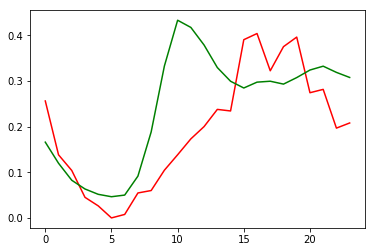

In [73]:
sample_id = randint(0, testY.shape[0] - 1)
feature_id = randint(0, feature_size)
print sample_id, feature_id, testY.shape[0]
pyplot.plot(testY[sample_id, :, feature_id], 'r')
pyplot.plot(testYhat[sample_id, :, feature_id], 'g')
pyplot.show()